<div align="center"> <b> <span style='color:#006600;'> <h1> IS 362 - ASSIGNMENT 13 </h1> </span> </b> </div>
<div align="center"> <b> <span style='color:red;'> <h2> PREPROCESSING DATA FOR SCIKIT-LEARN  </h2> </span> </b> </div>
<div align="center"> <h3 style='color: blue;'>Author: <span style='color: red;'>Rickardo Henry</span></h3>

The <b>Mushrooms Dataset</b> is a famous—if slightly moldy—dataset about mushrooms can be found in the UCI repository [here](https://archive.ics.uci.edu/ml/datasets/Mushroom). The fact that this is such a well-known dataset in the data science community has made it a good dataset to use for comparative benchmarking. For example, if someone was working to build a better decision tree algorithm <i>(or other predictive classifier)</i> to analyze categorical data, this dataset could be useful. 

In Project 4, we’ll use <b>scikit-learn</b> to answer the question, <i>“Which other attribute or attributes are the best predictors of whether a particular mushroom is poisonous or edible?” </i>  

Your assignment is to: 

<ul> 

<li> First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to look around a bit, but it’s there! </li>

<li> Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing. </li>

<li> Add meaningful names for each column. </li>

<li> Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics. </li>

<li> Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected. </li>

<li> Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous. </li>

</ul> 

<b> We begin by importing all the necessary libraries. </b>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

<b> Next we can read the data and display the chosen columns. We as well can rename those columns. </b>

In [2]:
mushroom_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
                            sep = ',',
                            header = None,
                            usecols=[0, 5, 22],
                           names = ['Mushroom_Classes', 'Odor', 'Habitat'])

mushroom_data.head() 

,Mushroom_Classes,Odor,Habitat
0,p,p,u
1,e,a,g
2,e,l,m
3,p,p,u
4,e,n,g


<b> We continue by replacing the values from the columns to make them numerical. </b>

In [3]:
mushroom_data.replace(to_replace={'Mushroom_Classes':{'e': 0, 'p': 1}}, inplace = True)
mushroom_data.replace(to_replace={'Odor':{'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}}, inplace = True)
mushroom_data.replace(to_replace={'Habitat':{'g':0, 'l':1, 'm':2, 'p':3, 'u':4, 'w':5, 'd':6}}, inplace = True)

mushroom_data.head(10)

,Mushroom_Classes,Odor,Habitat
0,1,7,4
1,0,0,0
2,0,1,2
3,1,7,4
4,0,6,0
5,0,0,0
6,0,0,2
7,0,1,2
8,1,7,0
9,0,0,2


<b> We proceed by performing an exploratory data analysis. </b>

In [8]:
mushroom_total = mushroom_data['Mushroom_Classes'].value_counts()
mushroom_total #to get an idea of how many classes there are of mushrooms

0    4208
1    3916
Name: Mushroom_Classes, dtype: int64

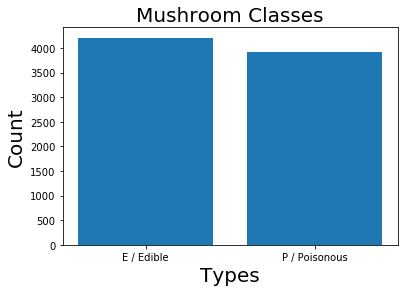

In [9]:
mush_type = ['E / Edible', 'P / Poisonous']
y_pos = np.arange(len(mush_type))
data = mushroom_total
colors = {0: 'r', 1: 'b'}
plt.bar(y_pos, data, align='center', alpha=1)
plt.xticks(y_pos, mush_type)
plt.xlabel('Types', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('Mushroom Classes', fontsize = 20)

plt.show()

<b> I gathered the odor info from the</b> [dataset](https://archive.ics.uci.edu/ml/datasets/Mushroom). 
<ul> <b>

<li> almond = a </li>
<li> anise = l </li>
<li> creosote = c </li>
<li> fishy = y </li>
<li> foul = f </li>
<li> musty = m </li>
<li> none = n </li>
<li> pungent = p </li>
<li> spicy = s </li>
</b></ul>

<b>Looking at the data, we can see that the number of edible mushrooms have the highest ODOR count. </b>

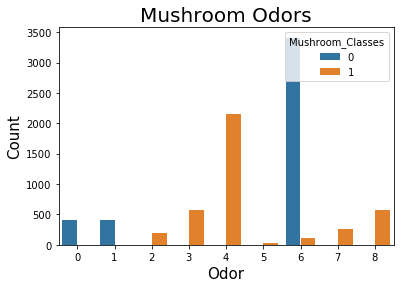

In [10]:
mush_odor = sns.countplot(x = 'Odor',
                           data = mushroom_data,
                           hue='Mushroom_Classes')
plt.xlabel('Odor', size = 15)
plt.ylabel('Count', size = 15)
plt.xticks(rotation = 0)
plt.title('Mushroom Odors', fontsize = 20)

<b> We can see regardless of the habitat mushrooms will to grow. </b>

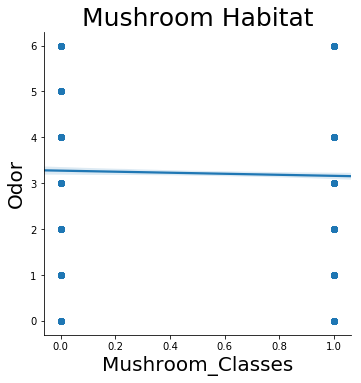

In [7]:
classes_vs_hab = sns.lmplot(x = 'Mushroom_Classes', y = 'Habitat', data = mushroom_data)
plt.title('Mushroom Habitat', fontsize = 25)
plt.xlabel('Mushroom_Classes', size = 20)
plt.ylabel('Odor', size = 20)

<div align="center"> <b> <span style='color:#006600;'> <h1> THANK YOU! </h1> </span> </b> </div>